In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

In [28]:
X, y = make_blobs(n_samples=1000, n_features=3, centers=2, random_state=0)
y.shape

(1000,)

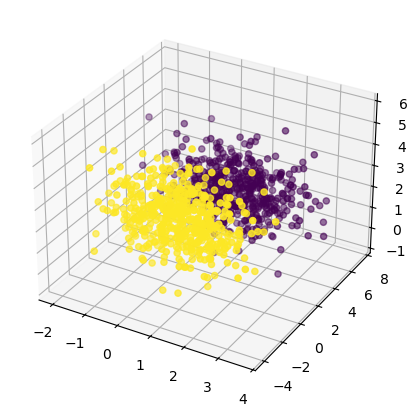

In [29]:
y = y.reshape(y.shape[0], 1)
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
%matplotlib inline
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap="viridis")
plt.show()


In [31]:
def init(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return W, b
    

In [32]:
def model(X, W, b):
    Z = np.dot(X, W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [33]:
def log_loss(A,y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [34]:
def gradients(A,X,y):
    dW = 1 / len(y) * X.T.dot(A - y)
    db = 1 / len(y) * np.sum(A - y)
    return dW,db

In [37]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b

In [38]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

In [39]:
def perceptron(X, y, learning_rate=0.1, epochs=100):
    W, b = init(X)
    Loss = []
    for i in range(epochs):
        A = model(X, W, b)
        Loss.append(log_loss(A,y))
        dW, dB = gradients(A,X,y)
        W, b = update(dW, dB, W, b, learning_rate)
    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))
    plt.plot(Loss)
    plt.show()
    return (W,b)

0.993


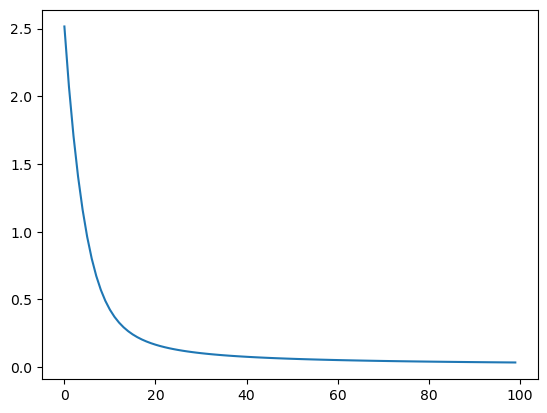

In [40]:
W, b = perceptron(X, y)

In [41]:
W

array([[ 1.06447488],
       [-1.77882686],
       [-0.07736212]])

In [52]:
b

array([2.02927449])

In [44]:
# Nouveau point à classifier
new_plant = np.array([2, 1, 1])

# Création de la figure 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Tracé des points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap="summer", edgecolors="k")
ax.scatter(new_plant[0], new_plant[1], new_plant[2], c="red", marker="x", s=100)

# Génération du plan de séparation
x0_range = np.linspace(-1, 4, 10)
x1_range = np.linspace(-1, 4, 10)
x0, x1 = np.meshgrid(x0_range, x1_range)
x2 = (-W[0] * x0 - W[1] * x1 - b) / W[2]

# Affichage du plan de séparation
ax.plot_surface(x0, x1, x2, color="blue", alpha=0.3)

# Labels des axes
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("Frontière de Décision en 3D")
%matplotlib qt
plt.show()


/var/folders/k_/gyr5mvj920b9x6cgj7bvjgvh0000gn/T/ipykernel_60290/4157704839.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
